#  Example -  Training DQN agent on Minigrid

In RLHive, there are config samples for DQN agents, for different environment including Atari, Gym, Hanabi, Marlgrid, Minatar, and Minigrid.

In this tutorial, we are using simple environments from Minigrid (https://github.com/Farama-Foundation/Minigrid) with different sizes like `MiniGrid-Empty-5x5-v0` and `MiniGrid-Empty-16x16-v0` which have an empty room and the objective of the agent is to reach the green square as you see in the following picture. This is a partially observable environment.
The observation is a partially observable view of the grid with the size of 7x7x3. These values are not pixels.
The reward provided to the agent on reaching the green square is penalized by number of steps it took to reach there.

<!-- About the environment - We are using `MiniGrid-Empty-5x5-v0` environment which is an empty room and the objective of the agent is to reach the green sqare, the reward provided to the agent on reaching the green square is penalized and dependent on how many steps it took to reach there. -->

<p align="center">
  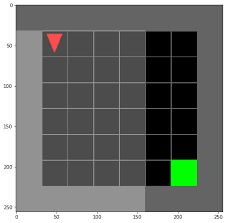
</p>

Here, we jusy install RLHive. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## used for updating config.yaml files 
!pip install ruamel.yaml &> /dev/null

!pip install git+https://github.com/chandar-lab/RLHive.git@dev &> /dev/null

## change the gym version, because of breaking changes in gym 0.25
!pip install gym==0.21.0 &> /dev/null
!pip install pygame &> /dev/null

In [ ]:
!pip install gym_minigrid==1.0.2 &> /dev/null

In [ ]:
## Required imports
import hive
import torch
from hive.agents.dqn import DQNAgent
from hive.runners.utils import load_config
from hive.runners.single_agent_loop import set_up_experiment
from hive.utils.loggers import get_logger
from ruamel import yaml
import os.path
import numpy as np
import os
import sys

<!-- Before we train the agent, first step is to install the environment dependencies.  -->
## Run RLHive
The simplest way to run RLhive (for a single agent) is enough to run:

 `hive_single_agent_loop -p PATH/TO/CONFIG_FILE`.  **😃**
 
 For Minigrid, you can just simply use the ready config file for DQN agent if you do not want to change anything:

 ` hive_single_agent_loop -p minigrid/config.yml`.

By running that, you will see the log files are saved in the experiment folder. By using them, you can plot the learning curves, e.g. returns, episode-lengths, etc..  



If you want to use a DQN agent with different features, e.g. different layers with different sizes, adding or removing target network, different schedules for updating the target network, etc. all you need to do is to create your desired config file and change its parameters accordingly and then train the agent on this config.

It is also possible to change the values of the parameters in the command line by overriding them like:

`hive_single_agent_loop -p gym/dqn.yml --agent.hidden_units [128, 128] --train_steps 1000`

in which we are changing the number of the `hidden-units` in the agent and the number of the `train-steps`. 


# Example one:
In this example, we are running `MiniGrid-Empty-5x5-v0` for `70000` train-steps for DQN agent with an MLP network with two layers of size `256`. 
Since we have randomness at each run, we would like to see the average results over different random seeds of the same configuration. 
<!-- A good number for repeating the experiment could be `30` different random seeds. However,  -->
Here, we considere `5` different random seeds to show the results. 

The logs for each random seed will be saved in a folder with the name of `run_name`. In this example, it is called `minigrid-empty-5x5-image-dqn-{hive_seed}` where `{hive_seed}` shows its corresponding seed's number.
With `save_dir`, you can change the directory of the saving path. By default, it is saved in the `experiment` folder in the current directory. 
Here, you can find the logs in the `experiment/minigrid5*5_test` path. 

In [ ]:
%env CUBLAS_WORKSPACE_CONFIG=:16:8

env: CUBLAS_WORKSPACE_CONFIG=:16:8


In [ ]:
# Training the DQN Agent
%%shell
hive_seeds=(0 1 2 3 4)
for hive_seed in ${hive_seeds[@]}
do
  hive_single_agent_loop --config  minigrid5_dqn.yml --seed $hive_seed --run_name "minigrid-empty-5x5-image-dqn-$hive_seed" --train_steps 70000 --agent.hidden_units [256, 256] --save_dir '/content/drive/MyDrive/experiment/minigrid5*5_dqn'
done 

Now, you can see the average plot for both reward and episode length by running the following codes. As you see here, DQN works well for this size of the environment and it converges to reward +1 after approximately 30000 steps.

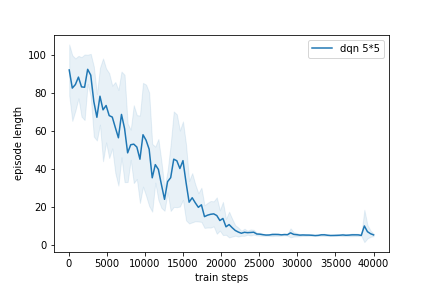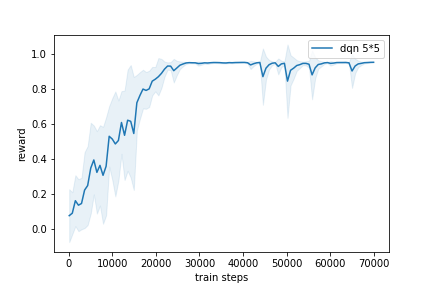

In [ ]:
# plotting rewards
from hive.utils import visualization

visualization.plot_results(experiments_folder='/content/drive/MyDrive/experiment',
    runs_folders=['minigrid5*5_dqn'],
    x_key='train',
    y_key='train/0_reward', x_label='train steps', y_label= 'reward', run_names=['dqn 5*5'], rc_params={}, smoothing_fn=visualization.get_smoothing_fn('exponential', {'smoothing': 0.4}),
    output_file='/content/drive/MyDrive/experiment/minigrid5_dqn_reward_10.png')

In [ ]:
#plotting episode length
from hive.utils import visualization

visualization.plot_results(experiments_folder='/content/drive/MyDrive/experiment',
    runs_folders=['minigrid5*5_dqn_1'],
    x_key='train',
    y_key='train/full_episode_length', x_label='train steps', y_label= 'episode length', run_names=['dqn 5*5'], rc_params={}, smoothing_fn=visualization.get_smoothing_fn('exponential', {'smoothing': 0.4}),
    output_file='/content/drive/MyDrive/experiment/minigrid5_dqn_episode_10.png')

# Example Two:
Now, let's try a more complicated environment, `MiniGrid-Empty-16x16-v0`.
As this environment is bigger, we expect the agent takes more training steps to learn. So, we set `100000` train-steps with the same DQN agent as above. 
Again, we considered `5` different random seeds to show the average results. 

By running the following code, You can find the result of this experiment in `experiment/minigrid16*16_test`.

In [ ]:
# Training the DQN Agent
%%shell
hive_seeds=(0 1 2 3 4)
for hive_seed in ${hive_seeds[@]}
do
  hive_single_agent_loop --config  minigrid16_dqn.yml --seed $hive_seed --run_name "minigrid-empty-16x16-image-dqn-$hive_seed" --train_steps 70000 --agent.hidden_units [256, 256] --save_dir '/content/drive/MyDrive/experiment/minigrid16*16_dqn'
done 

In [ ]:
from hive.utils import visualization

visualization.plot_results(experiments_folder='/content/drive/MyDrive/experiment',
    runs_folders=['minigrid16*16_dqn'],
    x_key='train',
    y_key='train/0_reward', x_label='train steps', y_label= 'reward', run_names=['dqn 16*16'], rc_params={}, smoothing_fn=visualization.get_smoothing_fn('exponential', {'smoothing': 0.4}),
    output_file='/content/drive/MyDrive/experiment/minigrid16*16_dqn_reward_10.png')

In [ ]:
from hive.utils import visualization

visualization.plot_results(experiments_folder='/content/drive/MyDrive/experiment',
    runs_folders=['minigrid16*16_dqn'],
    x_key='train',
    y_key='train/full_episode_length', x_label='train steps', y_label= 'episode length', run_names=['dqn 16*16'], rc_params={}, smoothing_fn=visualization.get_smoothing_fn('exponential', {'smoothing': 0.4}),
    output_file='/content/drive/MyDrive/experiment/minigrid16*16_dqn_episode_10.png')

The results for this environment is in the following:

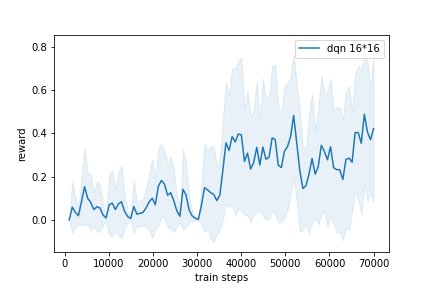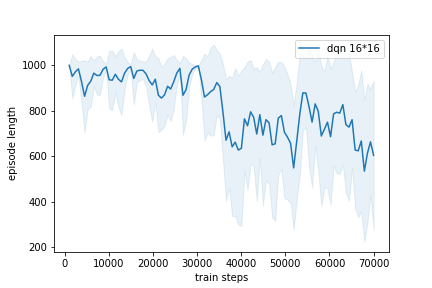

By comparing their learning curves of these two environments, you can see how much learning in the second environment by DQN is slow.

In [ ]:
from hive.utils import visualization

visualization.plot_results(experiments_folder='/content/drive/MyDrive/experiment',
    runs_folders=['minigrid5*5_dqn', 'minigrid16*16_dqn'],
    x_key='train',
    y_key='train/0_reward', x_label='train steps', y_label= 'reward', run_names=['dqn 5*5', 'dqn 16*16'], rc_params={}, smoothing_fn=visualization.get_smoothing_fn('exponential', {'smoothing': 0.4}),
    output_file='/content/drive/MyDrive/experiment/minigrid516_dqn_reward_10.png')

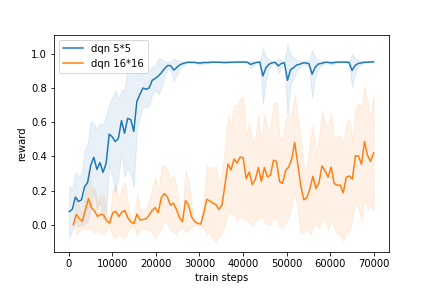

Now, let's try Rainbow agent to see if it can accelerate learning in the second environment.

# Rainbow agent:

The following code runs a Rainbow agent with the same setting as DQN agent for `MiniGrid-Empty-16x16-v0` for `100K` steps. 

In [ ]:
# Training the rainbow Agent
%%shell
hive_seeds=(0 1 2 3 4)
for hive_seed in ${hive_seeds[@]}
do
  echo $hive_seed
  hive_single_agent_loop --config  minigrid16_rainbow.yml --seed $hive_seed --run_name "minigrid-empty-16x16-image-rainbow-$hive_seed" --train_steps 100000 --save_dir '/content/drive/MyDrive/experiment/minigrid16*16_rainbow_100k'
done 

To show the learning curves, just run the following codes.

In [ ]:
from hive.utils import visualization

visualization.plot_results(experiments_folder='/content/drive/MyDrive/experiment',
    runs_folders=['minigrid16*16_rainbow_100k'],
    x_key='train',
    y_key='train/0_reward', x_label='train steps', y_label= 'reward', run_names=['rainbow 16*16'], rc_params={}, smoothing_fn=visualization.get_smoothing_fn('exponential', {'smoothing': 0.4}),
    output_file='/content/drive/MyDrive/experiment/minigrid16_rainbow_100k_reward_2.png')

In [ ]:
from hive.utils import visualization

visualization.plot_results(experiments_folder='/content/drive/MyDrive/experiment',
    runs_folders=['minigrid16*16_rainbow_100k'],
    x_key='train',
    y_key='train/full_episode_length', x_label='train steps', y_label= 'episode length', run_names=['rainbow 16*16'], rc_params={}, smoothing_fn=visualization.get_smoothing_fn('exponential', {'smoothing': 0.4}),
    output_file='/content/drive/MyDrive/experiment/minigrid16_rainbow_100k_episodelen_2.png')

Here, you can see the plots for reward and episode length. They show Rainbow learns the environment in a smaller number of steps versus DQN.

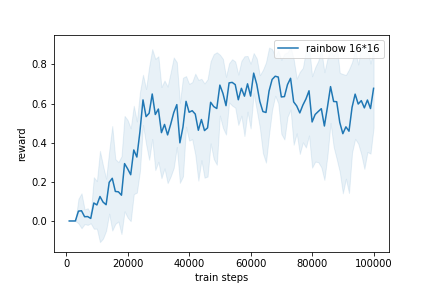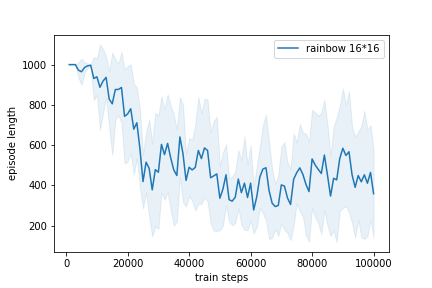


If you want to compare DQN and Rainbow agents precisely, you can bring them in the same plot, like here:

<!-- If you just compare that with the result from DQN, you can see that the rainbow agent learns faster, meaning it achieves a higher performance sooner for complicated environments.  -->

In [ ]:
from hive.utils import visualization

visualization.plot_results(experiments_folder='/content/drive/MyDrive/experiment',
    runs_folders=['minigrid16*16_rainbow_100k', 'minigrid16*16_dqn_1'],
    x_key='train',
    y_key='train/0_reward', x_label='train steps', y_label= 'reward', run_names=['rainbow 16*16', 'dqn 16*16'], rc_params={}, smoothing_fn=visualization.get_smoothing_fn('exponential', {'smoothing': 0.1}),
    output_file='/content/drive/MyDrive/experiment/minigrid16_dqnrainbow_reward_1.png')


In [ ]:
from hive.utils import visualization

visualization.plot_results(experiments_folder='/content/drive/MyDrive/experiment',
    runs_folders=['minigrid16*16_rainbow_100k', 'minigrid16*16_dqn_1'],
    x_key='train',
    y_key='train/full_episode_length', x_label='train steps', y_label= 'episode length', run_names=['rainbow 16*16', 'dqn 16*16'], rc_params={}, smoothing_fn=visualization.get_smoothing_fn('exponential', {'smoothing': 0.1}),
    output_file='/content/drive/MyDrive/experiment/minigrid16_dqnrainbow_episode_1.png')


and here are the plots:

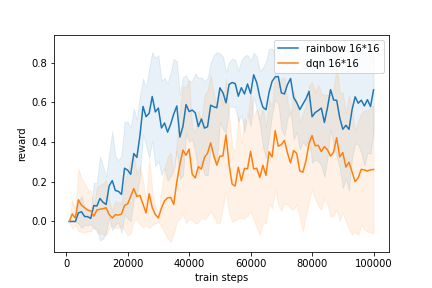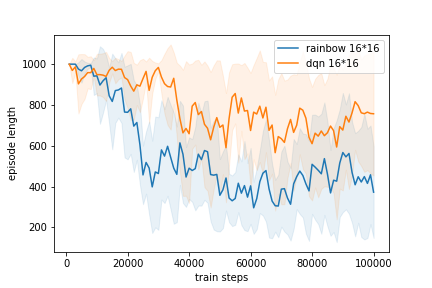

So, in this tutorial, DQN and Rainbow agents are run on two different sizes of Minigrid environment, `5` by `5` and `16` by `16`. We see that Rainbow agent was able to learn much faster than DQN in the environment with size `16` by `16` which is a more challenging and difficult environment. 